In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('sonar.all-data.csv')
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


<Axes: xlabel='Label', ylabel='count'>

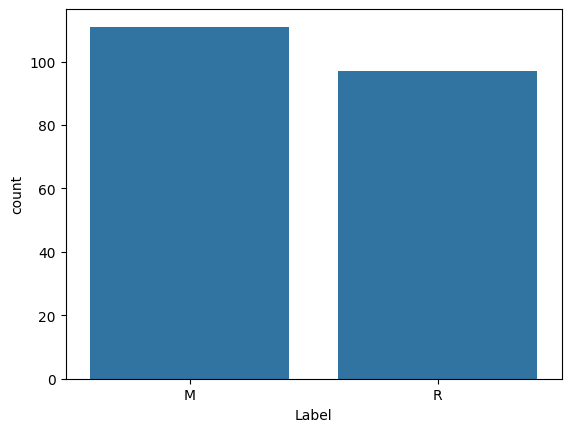

In [37]:
sns.barplot(df['Label'].value_counts())

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [39]:
X = df.drop('Label',axis=1)
y = df['Label']

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [41]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [42]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [43]:
operations = [('scaler',scaler),('knn',knn)]

In [44]:
pipe =  Pipeline(operations)

In [45]:
# when using 
param_grid = {'knn__n_neighbors':range(1,30)}

In [46]:
grid_cv_model = GridSearchCV(estimator=pipe,param_grid=param_grid,cv=5)

In [47]:
grid_cv_model.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 30)})

In [53]:
grid_cv_model.best_params_

{'knn__n_neighbors': 1}

In [54]:
y_pred = grid_cv_model.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [56]:
cm = confusion_matrix(y_test,y_pred)

C:\Users\AKHIL AHMED\AppData\Local\Temp\ipykernel_63836\2945638715.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[0].add_patch(mpatches.Rectangle((x - box_width / 2, y - 0.05), box_width, 0.1, fill=True, color='lightblue', edgecolor='black', linewidth=2))


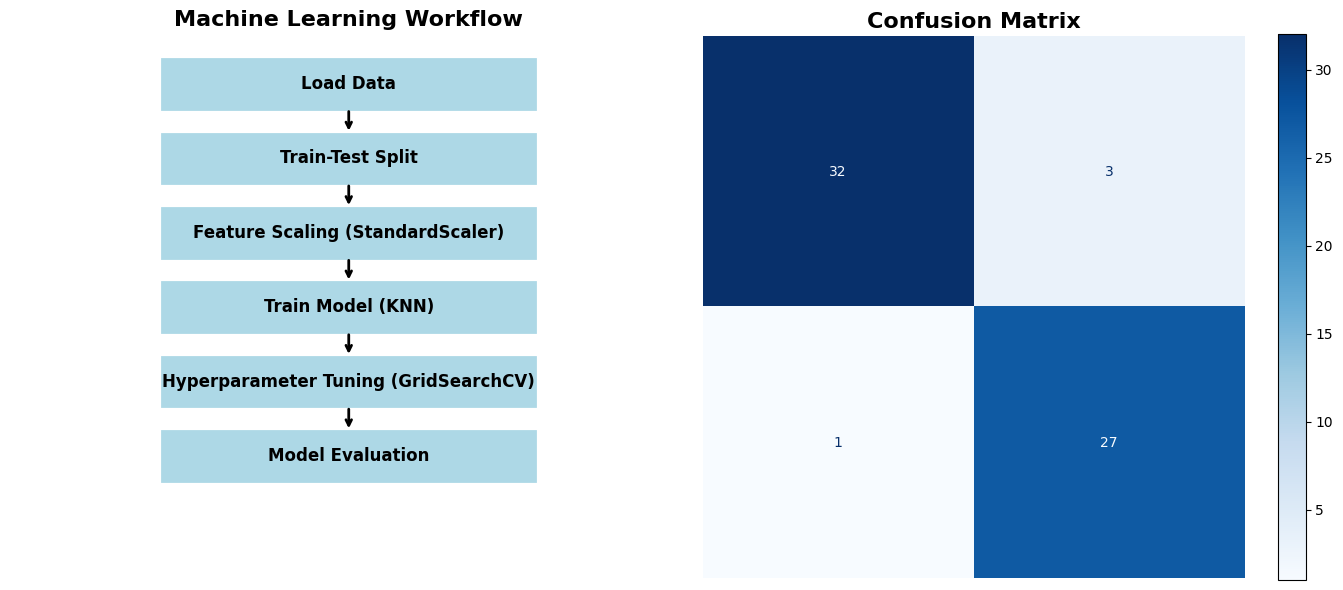

In [57]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are already defined (from your model's predictions)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['R', 'M'])

# Create the figure and subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# --- Flowchart Section (Left Plot) ---
# Define the flowchart steps and their positions
flowchart_steps = {
    "Load Data": (0.5, 0.9),
    "Train-Test Split": (0.5, 0.75),
    "Feature Scaling (StandardScaler)": (0.5, 0.6),
    "Train Model (KNN)": (0.5, 0.45),
    "Hyperparameter Tuning (GridSearchCV)": (0.5, 0.3),
    "Model Evaluation": (0.5, 0.15)
}

# Flowchart styling
box_width = 0.55
arrowprops = dict(arrowstyle="->", color="black", lw=2)
flowchart_fontsize = 12

# Draw flowchart steps as boxes
for step, (x, y) in flowchart_steps.items():
    axs[0].add_patch(mpatches.Rectangle((x - box_width / 2, y - 0.05), box_width, 0.1, fill=True, color='lightblue', edgecolor='black', linewidth=2))
    axs[0].text(x, y, step, ha='center', va='center', fontsize=flowchart_fontsize, fontweight='bold')

# Draw arrows between flowchart steps
for i, (step1, (x1, y1)) in enumerate(flowchart_steps.items()):
    if i < len(flowchart_steps) - 1:
        step2 = list(flowchart_steps.keys())[i + 1]
        x2, y2 = flowchart_steps[step2]
        axs[0].annotate('', xy=(x2, y2 + 0.05), xytext=(x1, y1 - 0.05), arrowprops=arrowprops)

# Set limits, remove axis, and add title for flowchart
axs[0].set_xlim(0, 1)
axs[0].set_ylim(-0.1, 1)
axs[0].axis('off')
axs[0].set_title('Machine Learning Workflow', fontsize=16, fontweight='bold')

# --- Confusion Matrix Plot (Right Plot) ---
# Plot the confusion matrix on the right subplot
disp.plot(ax=axs[1], cmap='Blues', values_format='d')



# Title and layout adjustments
axs[1].set_title('Confusion Matrix', fontsize=16, fontweight='bold')

# Remove axis for the confusion matrix plot
axs[1].axis('off')

# Adjust layout for better spacing between flowchart and confusion matrix
plt.tight_layout()

# Show the final plot
plt.show()
